In [3]:
import pandas as pd
import altair as alt

# DATA

In [4]:
df = pd.read_csv("rodent_data_with_neighborhoods.csv")
df.head()

,case_enquiry_id,open_dt,sla_target_dt,closed_dt,on_time,case_status,closure_reason,case_title,subject,reason,...,Married-couple family,Married-couple family %,Male householder,Male householder %,Female householder,Female householder %,Householder living alone,Householder living alone %,Householder not living alone,Householder not living alone %
0,101005402741,2024-04-08 10:46:24,2024-05-08 10:46:25,2024-04-08 23:45:32,ONTIME,Closed,Case Closed. Closed date : 2024-04-09 03:45:32...,Rodent Activity,Inspectional Services,Environmental Services,...,"5,053",38.4%,785,6.0%,"3,521",26.8%,"3,003",22.8%,785,6.0%
1,101005415613,2024-04-17 17:13:00,2024-05-17 17:13:37,2024-04-19 00:37:45,ONTIME,Closed,Case Closed. Closed date : Fri Apr 19 04:37:45...,Rodent Activity,Inspectional Services,Environmental Services,...,"2,840",35.8%,174,2.2%,320,4.0%,"3,641",45.8%,967,12.2%
2,101005357448,2024-03-19 09:44:00,2024-04-18 09:44:11,2024-03-21 03:13:44,ONTIME,Closed,Case Closed. Closed date : Thu Mar 21 07:13:44...,Rodent Activity,Inspectional Services,Environmental Services,...,"11,767",26.6%,"2,980",6.7%,"11,966",27.0%,"12,857",29.0%,"4,731",10.7%
3,101005357542,2024-03-19 10:31:00,2024-04-18 10:31:42,2024-03-20 01:52:06,ONTIME,Closed,Case Closed. Closed date : Wed Mar 20 05:52:06...,Rodent Activity,Inspectional Services,Environmental Services,...,"6,436",46.2%,525,3.8%,"1,566",11.2%,"4,433",31.8%,973,7.0%
4,101005274433,2024-01-26 15:36:00,2024-02-25 15:36:43,2024-01-28 22:57:39,ONTIME,Closed,Case Closed. Closed date : 2024-01-29 03:57:39...,Rodent Activity,Inspectional Services,Environmental Services,...,"5,538",33.7%,522,3.2%,"2,023",12.3%,"5,329",32.4%,"3,011",18.3%


# Rodent counts + per capita

In [5]:
# to numeric
df = df[df["Total Population"].isna() == False]
df['Total Population'] = df['Total Population'].str.replace(',', '').astype(int)

#  rodent count by neighborhood
rodent_counts = df.groupby('neighborhood').size().reset_index(name='rodent_count')

# Get unique population
population = df.groupby('neighborhood')['Total Population'].first().reset_index()

# merge rodent counts with population
stats = pd.merge(rodent_counts, population, on='neighborhood')
stats = stats[stats["neighborhood"] != "Allston / Brighton"]

# rodent count per capita
stats['rodent_per_capita'] = stats['rodent_count'] / stats['Total Population']

chosen_color = '#DB7093'  # palevioletred
open_sans_font = 'Open Sans'

In [6]:
# bar chart
bar_chart = alt.Chart(stats).mark_bar(color=chosen_color).encode(
    x=alt.X('neighborhood:N', title='Neighborhood', sort='-y'),
    y=alt.Y('rodent_per_capita:Q', title='Rodents per Capita'),
    #y='rodent_per_capita:Q',
    tooltip=['neighborhood', 'rodent_count', 'Total Population', 'rodent_per_capita']
).properties(
    title='Rodent Cases per Capita by Neighborhood',
    width=600
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)


bar_chart

alt.Chart(...)

In [7]:
income_cols = ["Neighborhood", "Median Income"]
income_df = df[income_cols].drop_duplicates()

# clean
income_df["Median Income"] = income_df["Median Income"].str.replace(",", "").str.replace("$", "")

# convert type
income_df["Median Income"] = income_df["Median Income"].astype(float)

In [8]:
income_df = income_df.sort_values(by="Median Income", ascending=False)

# # get low income
high_income_neighborhoods = income_df.head(3)['Neighborhood'].tolist()
low_income_neighborhoods = income_df.tail(3)['Neighborhood'].tolist()

In [9]:
low_income_df = df[df['Neighborhood'].isin(low_income_neighborhoods)]
high_income_df = df[df['Neighborhood'].isin(high_income_neighborhoods)]


In [10]:

# rodent counts
low_income_rodent_counts = low_income_df.groupby('neighborhood').size().reset_index(name='rodent_count')
high_income_rodent_counts = high_income_df.groupby('neighborhood').size().reset_index(name='rodent_count')

# total pop
low_income_population = low_income_df.groupby('neighborhood')['Total Population'].first().reset_index()
high_income_population = high_income_df.groupby('neighborhood')['Total Population'].first().reset_index()

# merge
low_income_stats = pd.merge(low_income_rodent_counts, low_income_population, on='neighborhood')
high_income_stats = pd.merge(high_income_rodent_counts, high_income_population, on='neighborhood')

# rodent per capita for both low and high income neighborhoods
low_income_stats['rodent_per_capita'] = low_income_stats['rodent_count'] / low_income_stats['Total Population']
high_income_stats['rodent_per_capita'] = high_income_stats['rodent_count'] / high_income_stats['Total Population']

# label
low_income_stats['income_group'] = 'Low Income'
high_income_stats['income_group'] = 'High Income'

# combine the dataframes
combined_stats = pd.concat([low_income_stats[['income_group', 'rodent_per_capita']], 
                            high_income_stats[['income_group', 'rodent_per_capita']]])


In [11]:

color_scale = alt.Scale(
    domain=['Low Income', 'High Income'],
    range=['#696969', '#696969']  # dimgray and tan
)

open_sans_font = 'Open Sans'

# bar chart
bar_chart = alt.Chart(combined_stats).mark_bar().encode(
    x=alt.X('income_group:N', title='Income Group'),
    y=alt.Y('rodent_per_capita:Q', title='Rodent per Capita'),
    color=alt.Color('income_group:N', scale=color_scale, legend=None),  # Custom colors, no legend if not needed
    tooltip=['income_group', 'rodent_per_capita']
).properties(
    title='Rodent Cases per Capita by Income Group',
    width=600
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)

bar_chart

alt.Chart(...)

# Case completion status

In [60]:
# Calculate percentages
df_percentage = df.groupby(['neighborhood', 'case_status']).size().reset_index(name='count')
df_percentage['percentage'] = df_percentage.groupby('neighborhood')['count'].transform(lambda x: x / x.sum() * 100)

# Calculate the total number of cases per neighborhood
df_percentage['total_cases'] = df_percentage.groupby('neighborhood')['count'].transform('sum')

# Calculate the percentage of "Not Completed" cases per neighborhood
df_percentage['percentage'] = df_percentage['count'] / df_percentage['total_cases'] * 100

# Filter the DataFrame to focus on "Not Completed" cases
df_not_completed = df_percentage[df_percentage['case_status'] == 'Not Completed']

missing_neighborhoods = set(df_percentage["neighborhood"]) - set(df_not_completed["neighborhood"])

# Prepare missing rows
missing_rows = []
for neighborhood in missing_neighborhoods:
    missing_rows.append([neighborhood, "Not Completed", 0, 0, 0])

# Create DataFrame from the missing rows
missing_df = pd.DataFrame(missing_rows, columns=df_not_completed.columns)

# Combine with original
df_not_completed = pd.concat([df_not_completed, missing_df], ignore_index=True)

chosen_color = '#D3D3D3'  # lightgray for 'Not Completed'
open_sans_font = 'Open Sans'


chart = alt.Chart(df_not_completed).mark_bar(color=chosen_color).encode(
    x=alt.X('neighborhood:N', title='Neighborhood', sort = "-y"),
    y=alt.Y('percentage:Q', title='Percentage Not Completed'),
    tooltip=['neighborhood', 'case_status', 'percentage:Q']
).properties(
    title='Percentage of Not Completed Cases by Neighborhood',
    width=600
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)

chart

alt.Chart(...)

In [28]:
uncompleted_df = df_percentage[df_percentage['case_status'] == 'Not Completed']
uncompleted_map = uncompleted_df.set_index('neighborhood')['percentage'].to_dict()

def get_uncompleted_percentage(neighborhood):
    return uncompleted_map.get(neighborhood, 0)

# uncompleted percent
low_percentages = [get_uncompleted_percentage(n) for n in low_income_neighborhoods]
low_avg = sum(low_percentages) / len(low_percentages)
print(uncompleted_map)
print(low_percentages)


high_percentages = [get_uncompleted_percentage(n) for n in high_income_neighborhoods]
high_avg = sum(high_percentages) / len(high_percentages)

result_df = pd.DataFrame({
    'income_group': ['Low Income', 'High Income'],
    'percentage': [low_avg, high_avg]
})

print(result_df)

{'Allston / Brighton': 0.4975124378109453, 'Back Bay': 0.36496350364963503, 'Charlestown': 0.7518796992481203, 'Dorchester': 0.28530670470756064, 'Downtown / Financial District': 1.7316017316017316, 'East Boston': 1.0714285714285714, 'Fenway / Kenmore / Audubon Circle / Longwood': 1.282051282051282, 'Hyde Park': 0.78125, 'Jamaica Plain': 1.2121212121212122, 'Mattapan': 1.0050251256281406, 'Roslindale': 1.8633540372670807, 'Roxbury': 1.6985138004246285, 'South Boston': 3.225806451612903, 'South Boston / South Boston Waterfront': 2.484472049689441, 'South End': 1.7632241813602016}
[0, 0, 0]
  income_group  percentage
0   Low Income         0.0
1  High Income         0.0


In [29]:
low_income_df = df[df['Neighborhood'].isin(low_income_neighborhoods)]
high_income_df = df[df['Neighborhood'].isin(high_income_neighborhoods)]

In [30]:

#  percentages for low-income neighborhoods
low_income_percentage = low_income_df[low_income_df['case_status'] == 'Not Completed'] \
    .groupby(['neighborhood']).size().reset_index(name='count')
low_income_percentage['total_cases'] = low_income_df.groupby('neighborhood').size().reset_index(name='total_cases')['total_cases']

low_income_percentage['percentage'] = low_income_percentage['count'] / low_income_percentage['total_cases'] * 100
low_income_percentage['income_group'] = 'Low Income'

#  percentages for high-income neighborhoods
high_income_percentage = high_income_df[high_income_df['case_status'] == 'Not Completed'] \
    .groupby(['neighborhood']).size().reset_index(name='count')
high_income_percentage['total_cases'] = high_income_df.groupby('neighborhood').size().reset_index(name='total_cases')['total_cases']
high_income_percentage['percentage'] = high_income_percentage['count'] / high_income_percentage['total_cases'] * 100
high_income_percentage['income_group'] = 'High Income'


new_row = pd.DataFrame([{'neighborhood': 'Mission Hill', 'count': 0, "total_cases": 0, "percentage": 0, "income_group": "Low Income"}])

low_income_percentage.loc[1, 'percentage'] = 1.6985

low_income_percentage = pd.concat([low_income_percentage, new_row], ignore_index=True)

# Aggregate the data
low_income_percentage_agg = low_income_percentage[['percentage', 'income_group']].groupby('income_group').mean().reset_index()

high_income_percentage_agg = high_income_percentage[['percentage', 'income_group']].groupby('income_group').mean().reset_index()

# combine dfs
combined_percentage_df = pd.concat([low_income_percentage_agg, high_income_percentage_agg])


color_scale = alt.Scale(
    domain=['Low Income', 'High Income'],
    range=['#696969', '#696969']  # dimgray and tan
)

open_sans_font = 'Open Sans'

# Chart
chart = alt.Chart(combined_percentage_df).mark_bar().encode(
    x=alt.X('income_group:N', title='Income Group'),
    y=alt.Y('percentage:Q', title='Percentage Not Completed'),
    color=alt.Color('income_group:N', scale=color_scale, legend=None),  # Use consistent color scheme
    tooltip=['income_group', 'percentage:Q']
).properties(
    title='Percentage of Not Completed Cases by Income Group',
    width=600
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)

chart

alt.Chart(...)

In [101]:

brush = alt.selection_interval(
    encodings=['x'],  # Enable brushing on the x-axis (case_time_hours)
    empty='all',  # Ensure the plot is displayed fully when no selection is made
     clear='mouseout'
)

# Density plot 
density_plot = alt.Chart(combined_df).transform_density(
    'case_time_hours',
    as_=['case_time_hours', 'density'],
    groupby=['income_group']
).mark_line().encode(
    x=alt.X('case_time_hours:Q', title='Case Time (Hours)'),
    y=alt.Y('density:Q', title='Density'),
    color=alt.Color('income_group:N', scale=color_scale),
    tooltip=['income_group:N', 'case_time_hours:Q', 'density:Q']
).properties(
    title='Density of Case Time by Income Group',
    width=600
).add_selection(
    brush  # Add the interval selection to allow filtering
).transform_filter(
    brush  # Filter data based on the selected range
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)


density_plot


/var/folders/84/5kzhs2sj7ml2kl9q4l0db72r0000gn/T/ipykernel_21740/3321475275.py:11: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  density_plot = alt.Chart(combined_df).transform_density(


alt.Chart(...)

In [ ]:
# NOT USED BELOW

In [39]:
# Density plot
density_plot = alt.Chart(combined_df).transform_density(
    'case_time_hours',
    as_=['case_time_hours', 'density'],
    groupby=['income_group']
).mark_line().encode(
    x=alt.X('case_time_hours:Q', title='Case Time (Hours)'),
    y=alt.Y('density:Q', title='Density'),
    color=alt.Color('income_group:N', scale=color_scale),
    tooltip=['income_group:N', 'case_time_hours:Q', 'density:Q']
).properties(
    title='Density of Case Time by Income Group',
    width=600
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)

density_plot



alt.Chart(...)

In [36]:

# Calculate case time in hours for low income neighborhoods
low_income_df['open_dt'] = pd.to_datetime(low_income_df['open_dt'])
low_income_df['closed_dt'] = pd.to_datetime(low_income_df['closed_dt'])
low_income_df['case_time_hours'] = (low_income_df['closed_dt'] - low_income_df['open_dt']).dt.total_seconds() / 3600
low_income_df['income_group'] = 'Low Income'

# Calculate case time in hours for high income neighborhoods
high_income_df['open_dt'] = pd.to_datetime(high_income_df['open_dt'])
high_income_df['closed_dt'] = pd.to_datetime(high_income_df['closed_dt'])
high_income_df['case_time_hours'] = (high_income_df['closed_dt'] - high_income_df['open_dt']).dt.total_seconds() / 3600
high_income_df['income_group'] = 'High Income'

# Combine the two dataframes (low and high income)
combined_df = pd.concat([low_income_df[['income_group', 'neighborhood', 'case_time_hours']],
                         high_income_df[['income_group', 'neighborhood', 'case_time_hours']]])


# Color scale and font
color_scale = alt.Scale(
    domain=['Low Income', 'High Income'],
    range=['#696969', '#D2B48C']  # dimgray and tan
)
open_sans_font = 'Open Sans'

# Boxplot
boxplot = alt.Chart(combined_df).mark_boxplot().encode(
    x=alt.X('income_group:N', title='Income Group'),
    y=alt.Y('case_time_hours:Q', title='Case Time (Hours)'),
    color=alt.Color('income_group:N', scale=color_scale, legend=None),
    tooltip=['neighborhood', 'case_time_hours']
).properties(
    title='Distribution of Case Time by Income Group',
    width=600
).configure_title(
    font=open_sans_font,
    fontSize=16
).configure_axis(
    labelFont=open_sans_font,
    titleFont=open_sans_font
).configure_legend(
    labelFont=open_sans_font,
    titleFont=open_sans_font
)

boxplot


/var/folders/84/5kzhs2sj7ml2kl9q4l0db72r0000gn/T/ipykernel_21740/3846090973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_df['open_dt'] = pd.to_datetime(low_income_df['open_dt'])
/var/folders/84/5kzhs2sj7ml2kl9q4l0db72r0000gn/T/ipykernel_21740/3846090973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_income_df['closed_dt'] = pd.to_datetime(low_income_df['closed_dt'])
/var/folders/84/5kzhs2sj7ml2kl9q4l0db72r0000gn/T/ipykernel_21740/3846090973.py:4: SettingWithCopyWarning: 
A value i

alt.Chart(...)

In [69]:
df[df['neighborhood'] == "East Boston"]["case_time_hours"]

61      21.981111
87      90.197778
105      9.386389
125     23.835556
136     25.482778
          ...    
4714    54.779167
4740     4.994722
4753    20.649444
4771    13.509444
4806    14.267500
Name: case_time_hours, Length: 280, dtype: float64

In [72]:
df['case_time_hours'].describe()

count    4752.000000
mean       41.369465
std        75.553675
min         0.001111
25%        10.521736
50%        21.433750
75%        58.489653
max      2065.616111
Name: case_time_hours, dtype: float64

In [73]:
east_boston_df = df[df['neighborhood'] == 'East Boston']
print(east_boston_df['case_time_hours'].describe())

count    277.000000
mean      30.603583
std       34.742935
min        0.012222
25%       12.653333
50%       18.715833
75%       40.969722
max      328.500833
Name: case_time_hours, dtype: float64


# Race demos

In [57]:

race_count_cols = [val for val in list(df.columns)[32:42] if "%" not in val]
# Apply the conversion to each column
for column in race_count_cols:
    df[column] = df[column].str.replace(',', '').astype(int)

race_count_cols.append("Neighborhood")
race_counts = df[race_count_cols].drop_duplicates()

In [58]:
neighborhoods = list(race_counts["Neighborhood"])

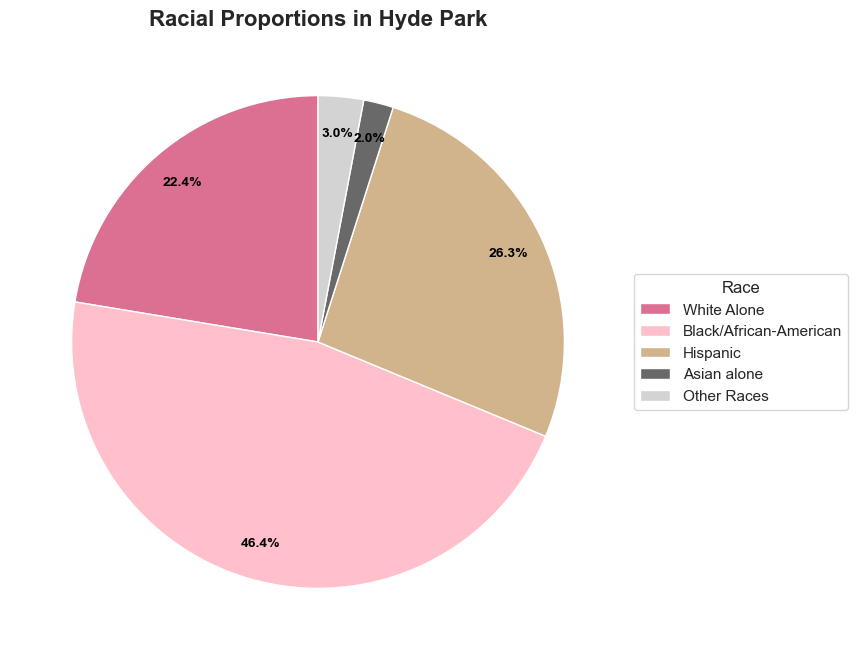

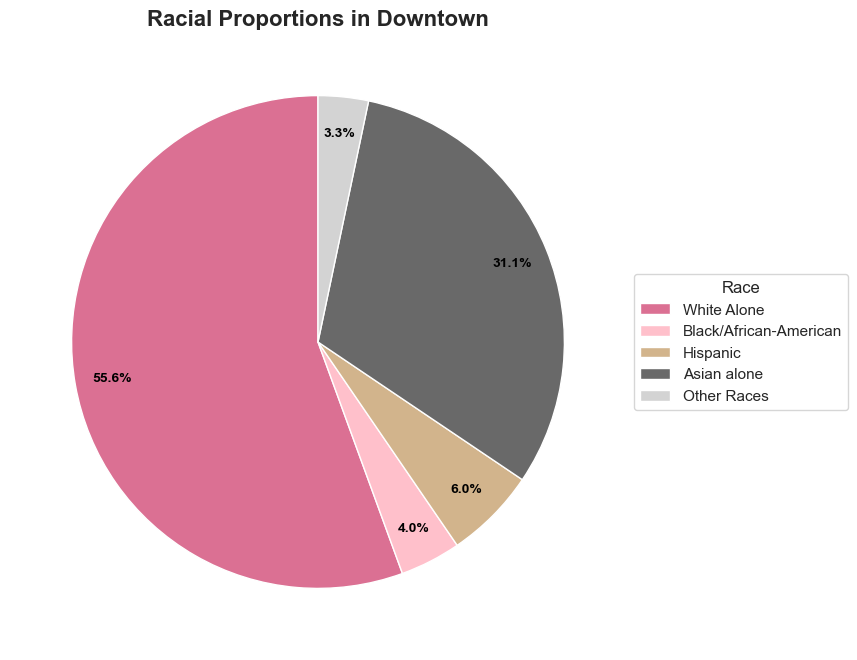

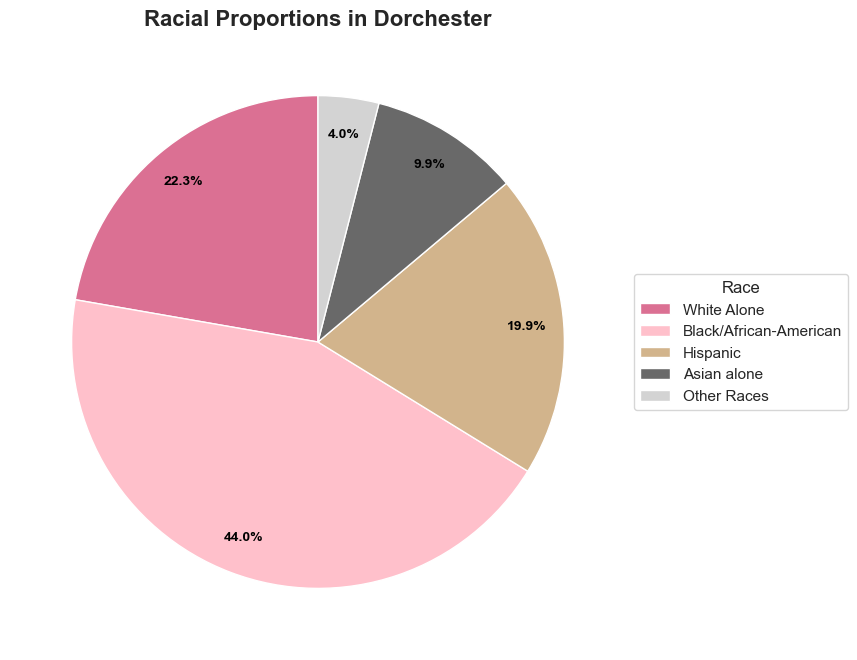

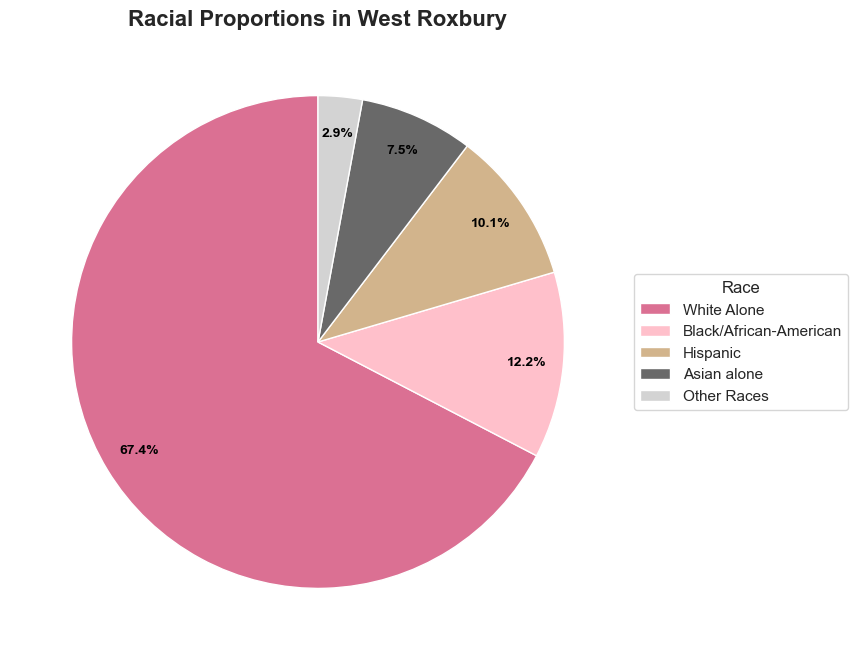

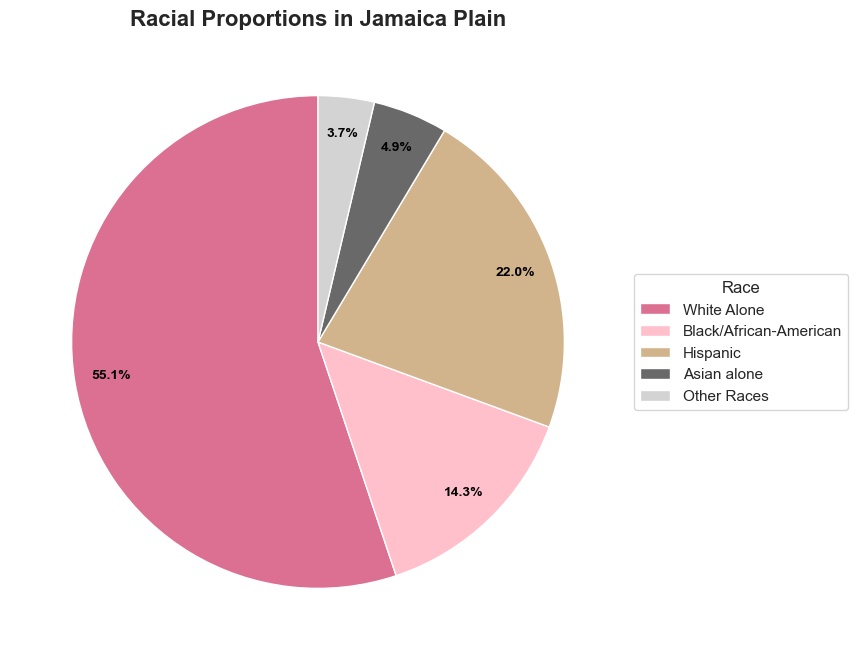

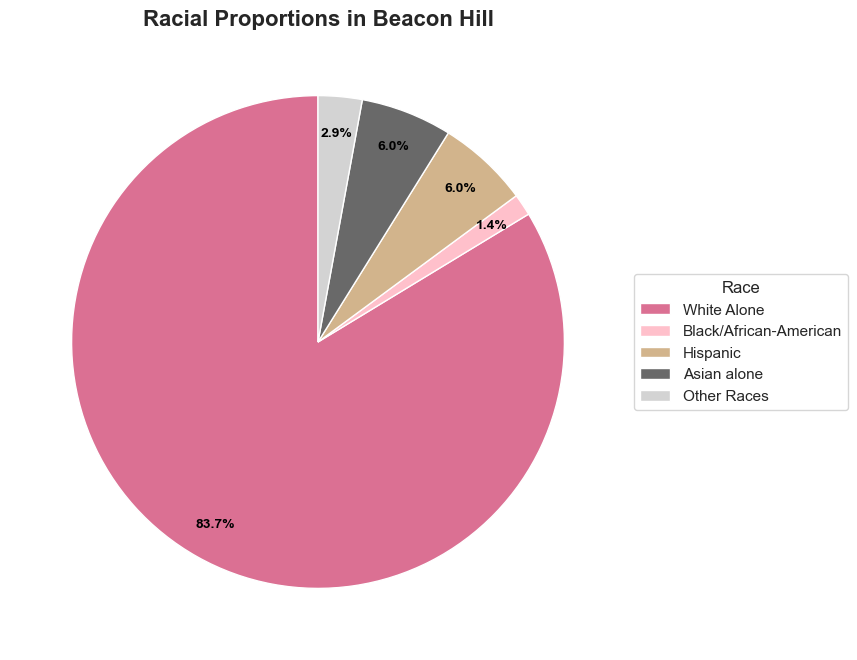

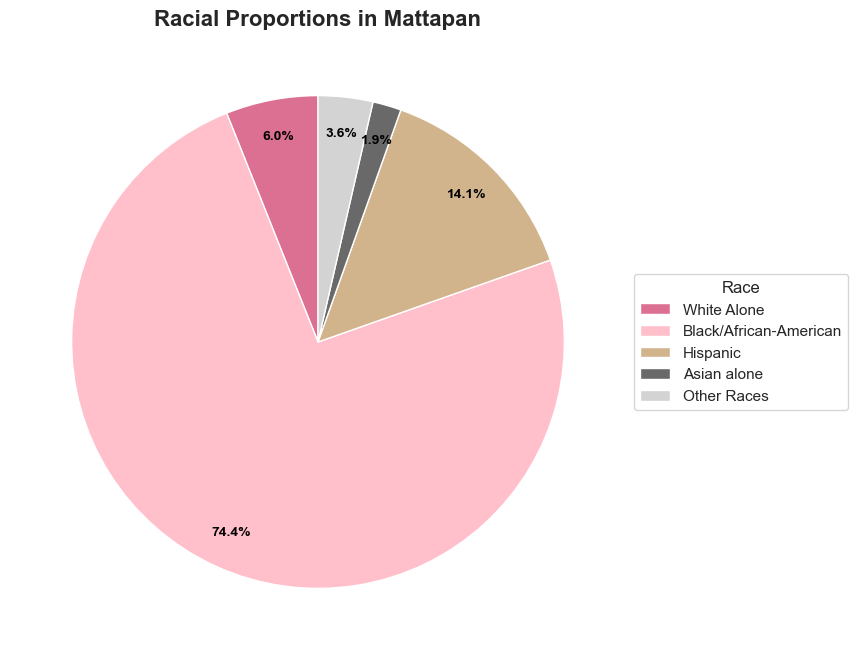

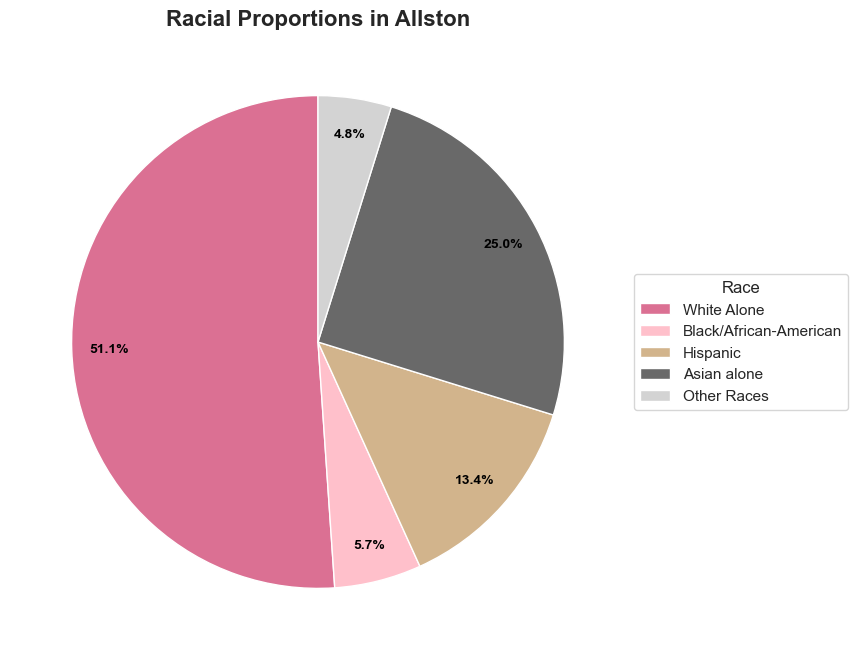

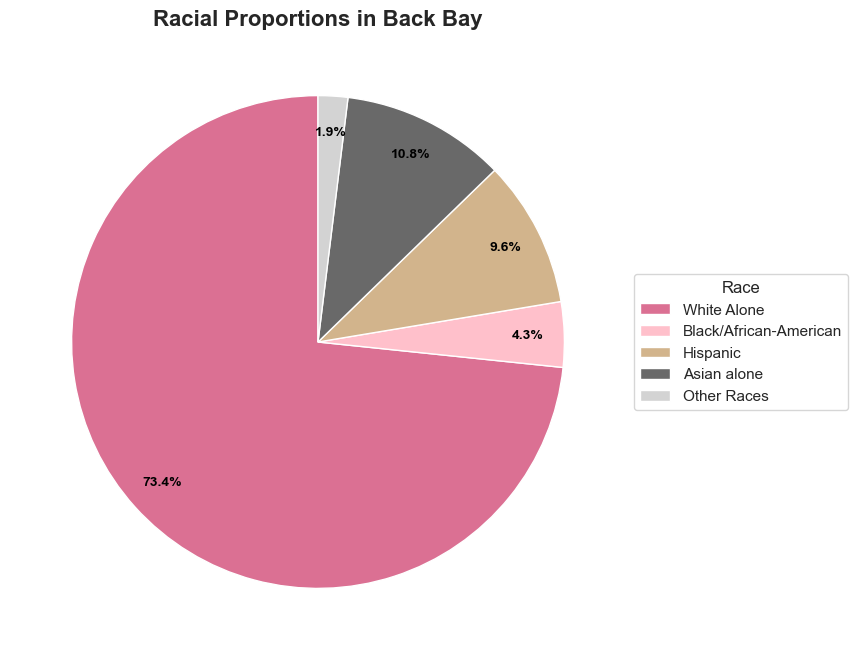

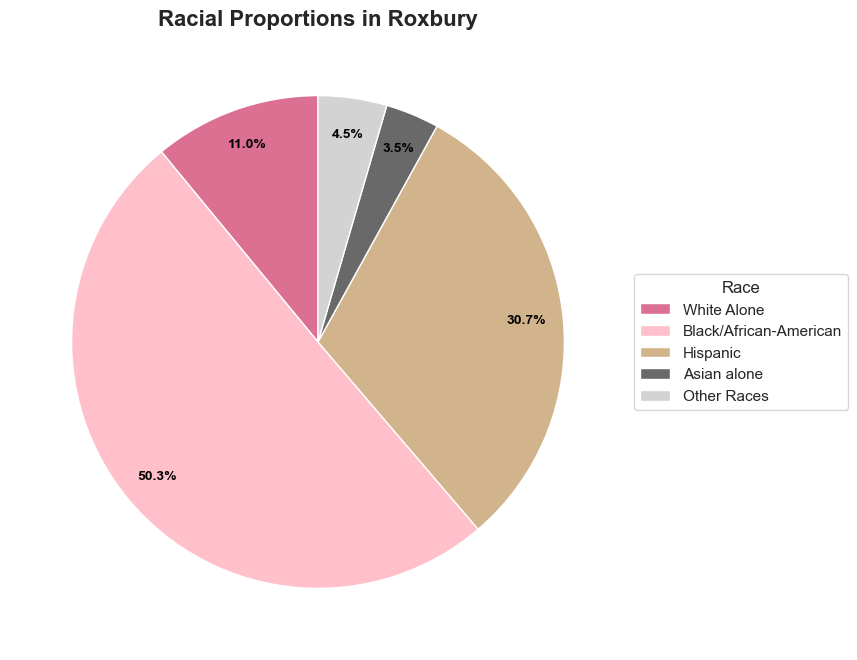

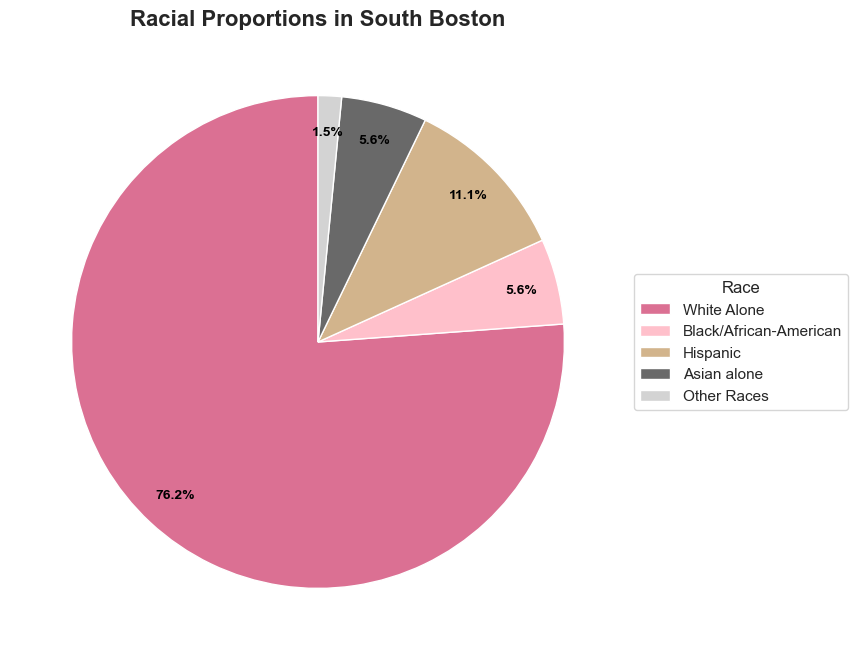

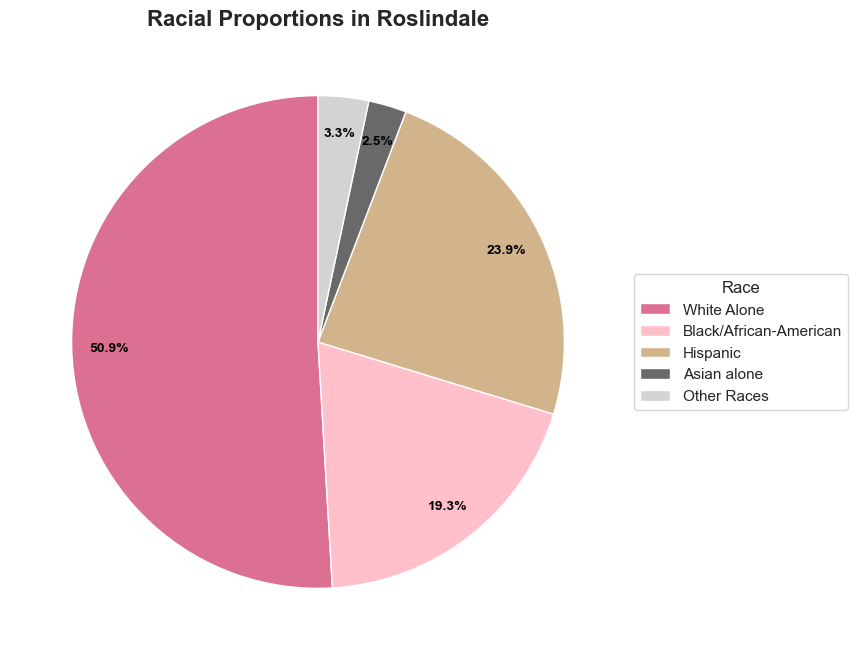

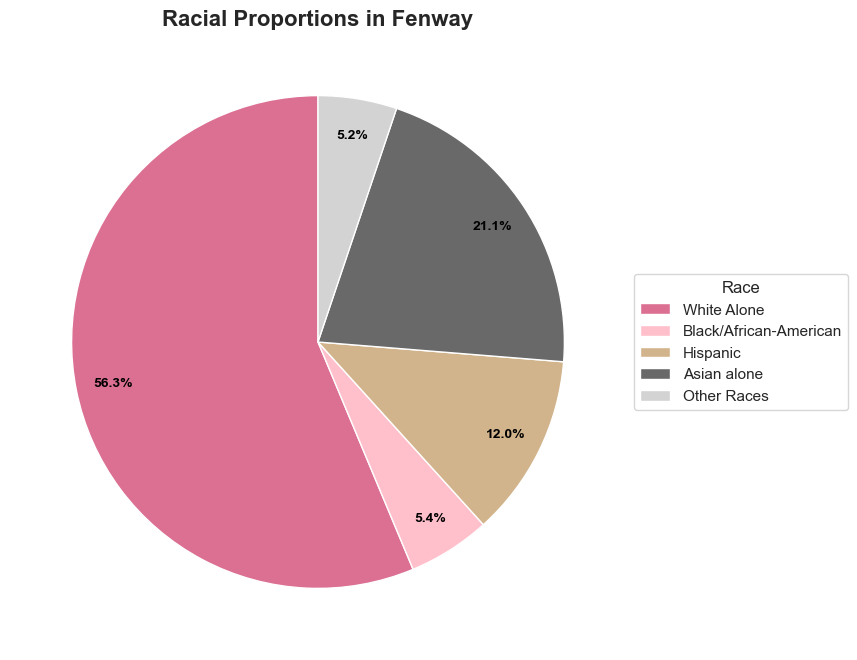

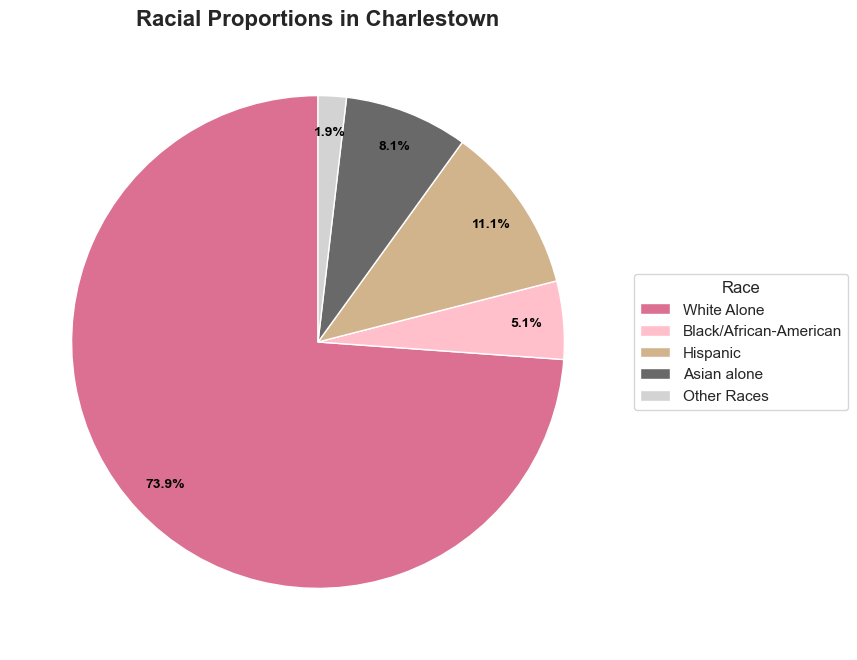

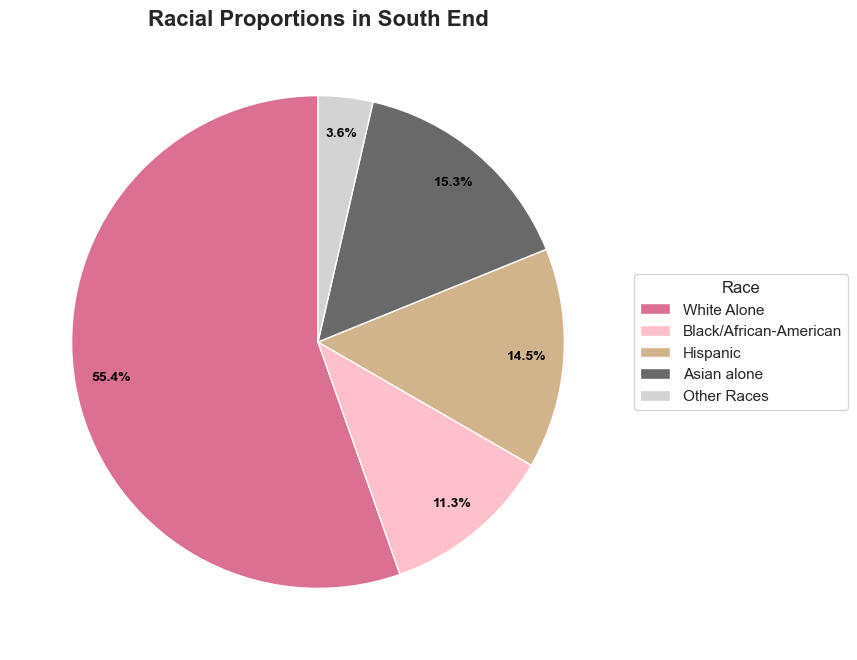

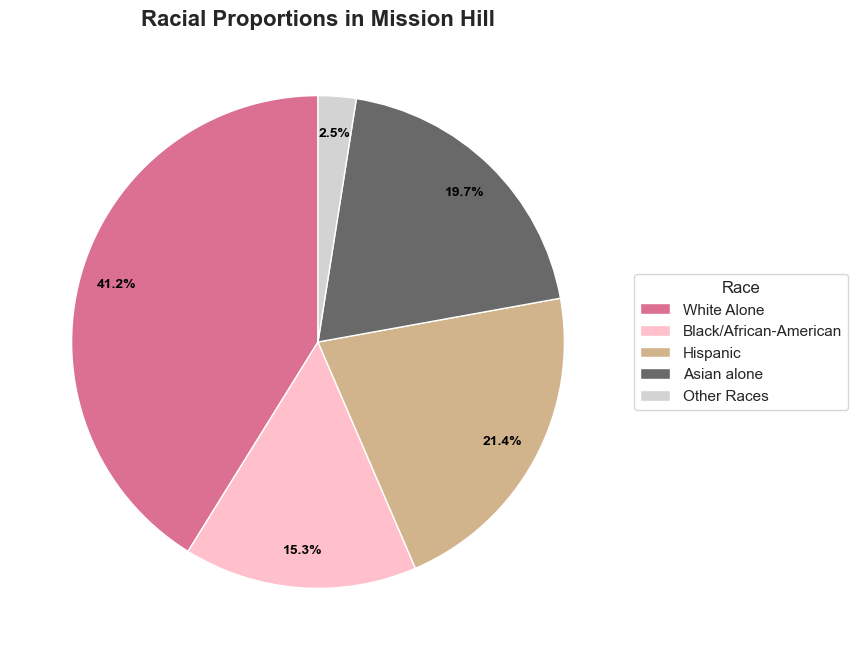

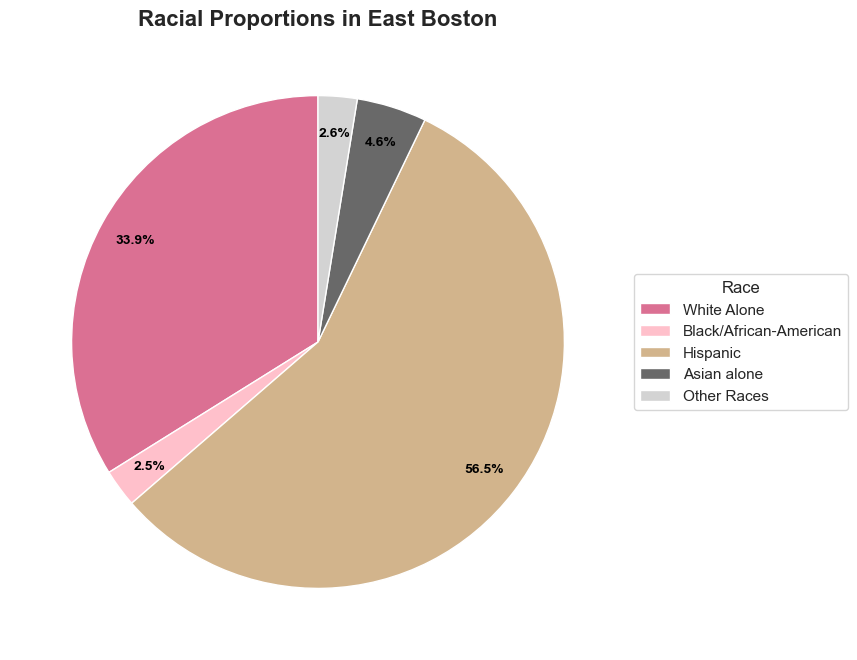

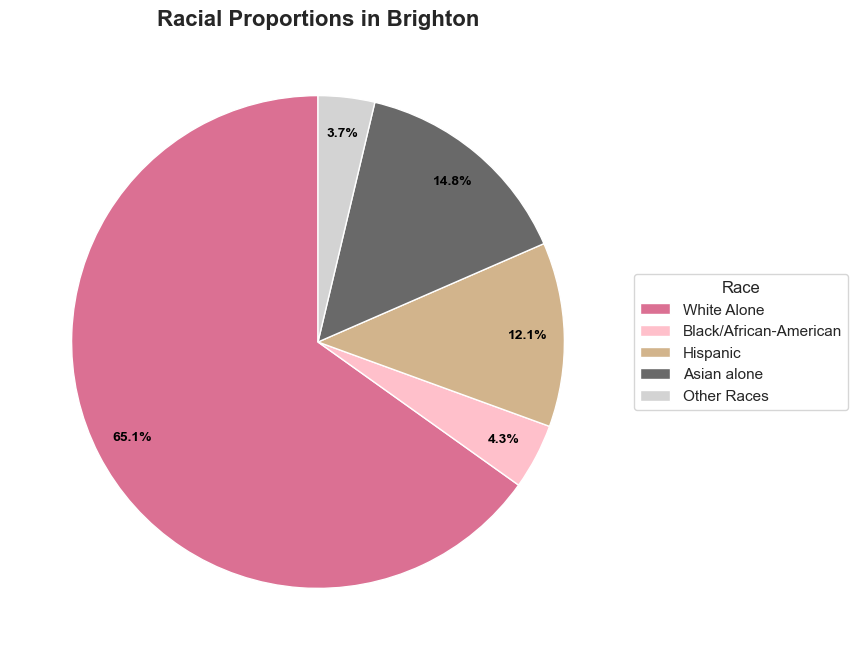

In [73]:
data = race_counts
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Melt the DataFrame to long format
melted_data = data.melt(id_vars='Neighborhood', 
                        var_name='Race', 
                        value_name='Population')

Colors = ["#D2B48C", "#696969", "#DB7093", "#FFC0CB", "#D3D3D3"]

for neighborhood in neighborhoods:
    # Filter for neighborhood
    neighborhood_data = melted_data[melted_data['Neighborhood'] == neighborhood]
    
    # Apply Seaborn's styling
    sns.set(style="whitegrid")

    #mpl.rcParams['font.family'] = 'Open Sans'

    # Use your custom color scheme
    custom_colors = [ "#DB7093", "#FFC0CB", "#D2B48C", "#696969", "#D3D3D3"]
    
    
    # Create a pie chart for 'hyde park' neighborhood
    plt.figure(figsize=(8, 8))
    
    # Stagger labels and prevent overlapping percentages and slice labels
    # Use legend instead of direct text on slices
    sizes = neighborhood_data['Population']
    labels = neighborhood_data['Race']
    #colors = sns.color_palette("Set3", len(neighborhood_data))
    colors = custom_colors[:len(neighborhood_data)]  # trim to match data length

    
    # Create the pie chart
    wedges, texts, autotexts = plt.pie(sizes, 
                                       labels=None, 
                                       autopct='%1.1f%%', 
                                       startangle=90, 
                                       colors=colors,
                                       textprops={'size': 10, 'weight': 'bold', 'color': 'black'},  # Style for percentage text
                                       pctdistance=0.85)
    
    # Add a legend instead of slice labels
    plt.legend(wedges, labels, title="Race", loc="center left", bbox_to_anchor=(1, 0.5))
    
    # Equal aspect ratio ensures that pie is drawn as a circle
    plt.gca().set_aspect('equal')
    
    plt.title(f'Racial Proportions in {neighborhood.title()}', fontsize=16, weight='bold')
    
    plt.savefig(f'race_props_new/{neighborhood.replace(" ", "_")}_racial_proportions.png', bbox_inches='tight', dpi=300)  # You can specify other file formats like .jpg, .pdf



In [68]:
melted_data

,Neighborhood,Race,Population
0,hyde park,White Alone,8719
1,downtown,White Alone,10172
2,dorchester,White Alone,28244
3,west roxbury,White Alone,22584
4,jamaica plain,White Alone,22533
...,...,...,...
90,south end,Other Races,1169
91,boston,Other Races,23389
92,mission hill,Other Races,433
93,east boston,Other Races,1207
